### 도시별 현재날씨로 검색.  
- https://www.weather.go.kr/weather/observation/currentweather.jsp


In [1]:
import requests  #웹페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup #HTML을 파싱하는 모듈

response = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
soup = BeautifulSoup(response.content,'html.parser')

In [2]:
table = soup.find('table',{'class':'table_develop3'})
table

<table class="table_develop3" summary="기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.">
<caption>기상실황표</caption>
<colgroup>
<col style="width:14%"/>
<col style="width:12%"/>
<col style="width:7%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:5%"/>
<col style="width:6%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:5%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:6%"/>
<col/>
</colgroup>
<thead>
<tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" id="headers-weather" scope="col">날씨</th>
<th class="top_line" colspan="3" id="headers-temp" scope="col">기온(℃)</th>
<th class="top_line" colspan="3" id="headers-rain" scope="col">강수</th>
<th class="top_line" colspan="2" id="headers-wind" scope="col">바람</th>
<th class="top_line" id="headers-press" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th class="nm" headers="header

In [3]:
data = []
for tr in table.find_all('tr'):
    
    tds = list(tr.find_all('td'))
    
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temperature = tds[5].text
            humidity = tds[9].text
            
            data.append([point,temperature,humidity])
            
data

[['강릉', '-3.1', '\xa0'],
 ['강진군', '-2.9', '\xa0'],
 ['강화', '-6.7', '\xa0'],
 ['거제', '-1.6', '\xa0'],
 ['거창', '-6.7', '\xa0'],
 ['경주시', '-3.2', '\xa0'],
 ['고산', '2.4', '\xa0'],
 ['고창', '-5.6', '4.4'],
 ['고창군', '-5.7', '6.0'],
 ['고흥', '-3.3', '\xa0'],
 ['광양시', '-1.8', '\xa0'],
 ['광주', '-2.9', '3.6'],
 ['구미', '-4.8', '\xa0'],
 ['군산', '-4.7', '0.8'],
 ['금산', '-8.7', '1.6'],
 ['김해시', '-3.1', '\xa0'],
 ['남원', '-6.9', '\xa0'],
 ['남해', '-2.6', '\xa0'],
 ['대관령', '-11.4', '\xa0'],
 ['대구', '-2.8', '\xa0'],
 ['대전', '-6.0', '2.1'],
 ['동두천', '-8.2', '\xa0'],
 ['동해', '-3.3', '\xa0'],
 ['목포', '-1.9', '\xa0'],
 ['문경', '-5.0', '\xa0'],
 ['밀양', '-2.6', '\xa0'],
 ['백령도', '-2.0', '1.8'],
 ['보령', '-3.7', '3.5'],
 ['보성군', '-2.1', '\xa0'],
 ['보은', '-10.2', '2.6'],
 ['봉화', '-6.7', '\xa0'],
 ['부산', '-1.3', '\xa0'],
 ['부안', '-5.9', '6.3'],
 ['부여', '-8.3', '\xa0'],
 ['북강릉', '-5.3', '\xa0'],
 ['북창원', '-1.1', '\xa0'],
 ['북춘천', '-9.4', '\xa0'],
 ['산청', '-3.0', '\xa0'],
 ['상주', '-4.8', '\xa0'],
 ['서귀포', '4.8', '\xa0'

### 데이터를 csv 파일에 저장하기 

In [5]:
with open('weather.csv','w',encoding='utf-8') as file:
    file.write('point, temperature, humidity \n')
    for i in data:
        file.write('{0},{1},{2} \n'.format(i[0],i[1],i[2]))

In [6]:
%matplotlib inline
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv',index_col='point',encoding='utf-8')
df

,temperature,humidity
point,,
강릉,-3.1,
강진군,-2.9,
강화,-6.7,
거제,-1.6,
거창,-6.7,
...,...,...
합천,-6.0,
해남,-3.6,
홍성,-3.2,


#### 특별시 광역시만 모으기

In [7]:
city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]
city_df

,temperature,humidity
point,,
서울,-6.6,
인천,-6.0,
대전,-6.0,2.1
대구,-2.8,
광주,-2.9,3.6
부산,-1.3,
울산,-2.1,


https://mindscale.kr/course/python-visualization-basic/font

In [10]:
from matplotlib import font_manager

In [13]:
!apt install fonts-nanum

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [14]:
for font in font_manager.fontManager.ttflist:
    print(font.name,font.fname)

DejaVu Serif C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif.ttf
STIXNonUnicode C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniBolIta.ttf
DejaVu Sans C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans-Oblique.ttf
DejaVu Sans Display C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansDisplay.ttf
cmex10 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmex10.ttf
STIXGeneral C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXGeneralItalic.ttf
STIXSizeThreeSym C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizThreeSymReg.ttf
STIXGeneral C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXGeneral.ttf
STIXNonUnicode C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniBol.ttf
DejaVu Sans Mono C:\ProgramData\Anaconda3\lib\si

In [30]:
import matplotlib
matplotlib.rcParams.update({
    #'mathtext.fontset': 'cm',
    'font.family': 'cmr10'
})
import matplotlib.pyplot as plt

In [31]:
#font 설정
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
#font_name = mpl.font_manager.FontProperties(fname='C:\\Windows\\Fonts\\MJ.TTF').get_name()
#mpl.rc('font',family=font_name)

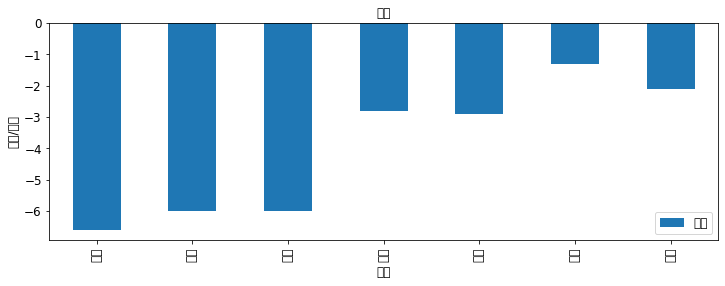

In [32]:
ax = city_df.plot(kind='bar', title='날씨', figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)
ax.set_ylabel('기온/습도',fontsize=12)
ax.legend(['기온','습도'], fontsize=12)